<a href="https://colab.research.google.com/github/Tic-tacDixlofos/PythonLabs/blob/main/Poiata_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества воздуха в Кишинёве (PM2.5, CO2, NO2)


В этом проекте используется API Службы мониторинга атмосферы Copernicus (CAMS) для анализа качества воздуха.
Мы исследуем концентрации PM2.5, CO2 и NO2 для региона Кишинёв, Молдова. Анализ включает:

1. **Загрузку данных через API**.
2. **Очистку и предварительную обработку данных**.
3. **Визуализацию ключевых показателей качества воздуха**.

Убедитесь, что у вас есть доступ к CAMS API. Если нет, зарегистрируйтесь на [Copernicus Atmosphere Monitoring Service](https://atmosphere.copernicus.eu/).


In [1]:
# Установка необходимых библиотек
!pip install pandas numpy matplotlib seaborn folium geopandas


# Импорт библиотек
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import numpy as np

import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd


In [2]:
# Задайте параметры API (замените 'your_api_key' на ваш реальный ключ)
API_URL = "e6c41a86-986e-4fda-80a7-6fdcc5d704ab/"
API_KEY = "8f24f7a1-cdca-4c97-8041-cab7d275f311"

In [3]:
# Параметры региона и временного периода
region = {"lat": 47.01, "lon": 28.86}  # Координаты Кишинёва
start_date = "2023-12-01"
end_date = "2023-12-07"
pollutants = ["PM2.5", "CO2", "NO2"]


In [4]:
# Функция для загрузки данных
def fetch_air_quality_data(pollutant, start_date, end_date, region, api_key):
    endpoint = f"{API_URL}/v1/data/air_quality"
    params = {
        "pollutant": pollutant,
        "start_date": start_date,
        "end_date": end_date,
        "latitude": region["lat"],
        "longitude": region["lon"],
        "key": api_key,
    }
    response = requests.get(endpoint, params=params)
    if response.status_code == 200:
        return pd.DataFrame(response.json()["data"])
    else:
        print(f"Ошибка: {response.status_code}, {response.text}")
        return pd.DataFrame()


In [7]:
# Загрузка данных для всех загрязнителей
data = {}
for pollutant in pollutants:
    print(f"Загрузка данных для {pollutant}...")
    data[pollutant] = fetch_air_quality_data(pollutant, start_date, end_date, region, '8f24f7a1-cdca-4c97-8041-cab7d275f311')


Загрузка данных для PM2.5...


MissingSchema: Invalid URL 'e6c41a86-986e-4fda-80a7-6fdcc5d704ab//v1/data/air_quality': No scheme supplied. Perhaps you meant https://e6c41a86-986e-4fda-80a7-6fdcc5d704ab//v1/data/air_quality?

In [8]:

# Очистка данных
def preprocess_data(df):
    df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
    df.set_index("datetime", inplace=True)
    df.drop(["timestamp"], axis=1, inplace=True)
    return df

cleaned_data = {pollutant: preprocess_data(data[pollutant]) for pollutant in data.keys() if not data[pollutant].empty}


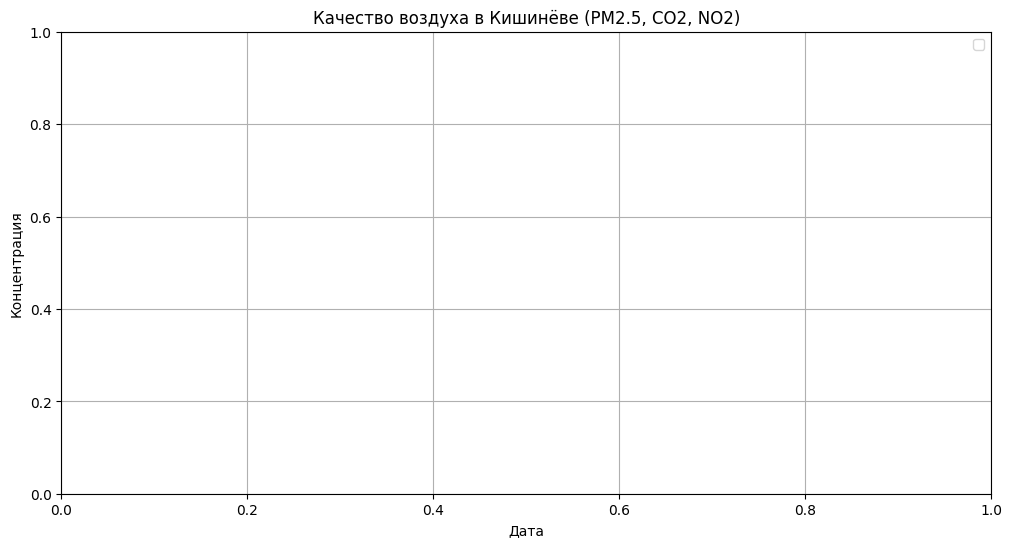

In [9]:

# Визуализация данных
plt.figure(figsize=(12, 6))
for pollutant, df in cleaned_data.items():
    plt.plot(df.index, df["value"], label=pollutant)

plt.title("Качество воздуха в Кишинёве (PM2.5, CO2, NO2)")
plt.xlabel("Дата")
plt.ylabel("Концентрация")
plt.legend()
plt.grid(True)
plt.show()


Основные описательные статистики:
                   datetime      PM2.5         CO2        NO2        lat  \
count                    6   6.000000    6.000000   6.000000   6.000000   
mean   2023-12-01 00:30:00  21.166667  413.333333  39.666667  47.020000   
min    2023-12-01 00:00:00  15.000000  400.000000  30.000000  47.010000   
25%    2023-12-01 00:00:00  18.250000  406.250000  35.750000  47.012500   
50%    2023-12-01 00:30:00  20.500000  412.500000  39.000000  47.020000   
75%    2023-12-01 01:00:00  24.250000  418.750000  43.750000  47.027500   
max    2023-12-01 01:00:00  28.000000  430.000000  50.000000  47.030000   
std                    NaN   4.792355   10.801234   7.118052   0.008944   

             lon  
count   6.000000  
mean   28.870000  
min    28.860000  
25%    28.862500  
50%    28.870000  
75%    28.877500  
max    28.880000  
std     0.008944  


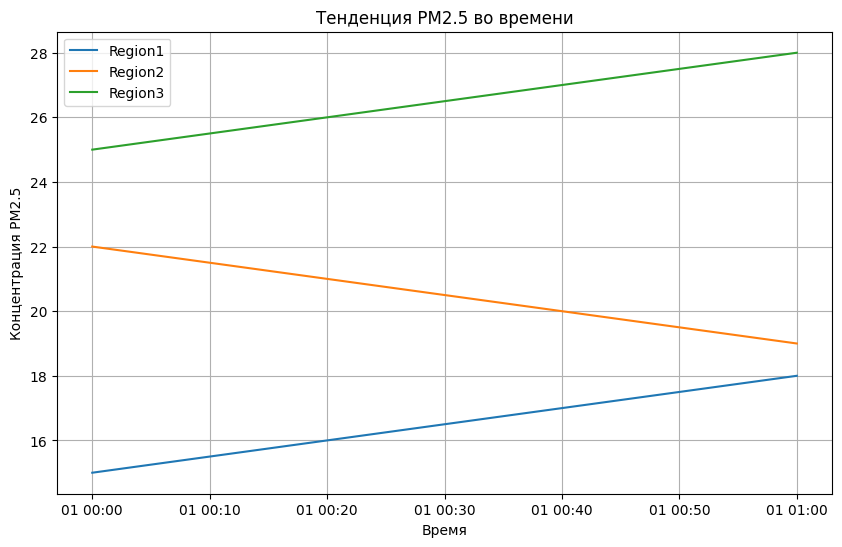

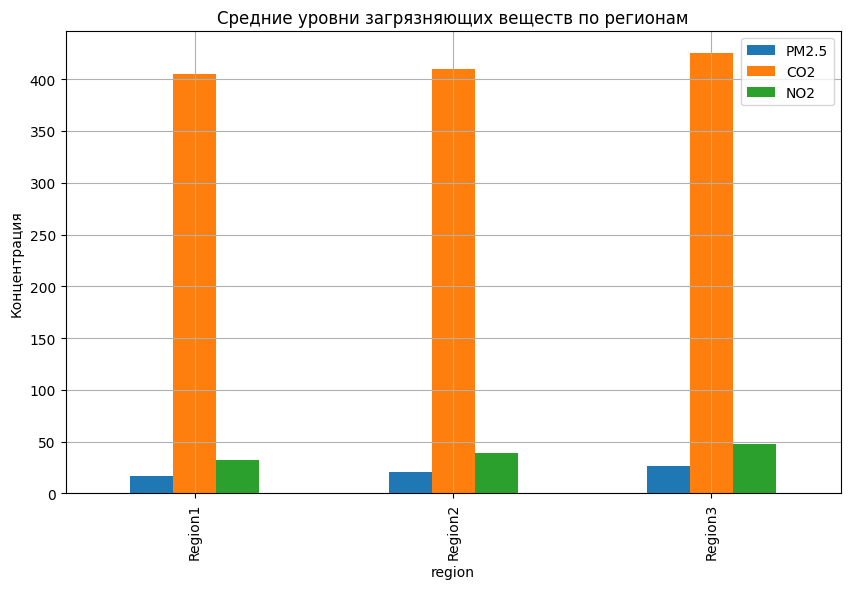

Тепловая карта сохранена как heatmap.html


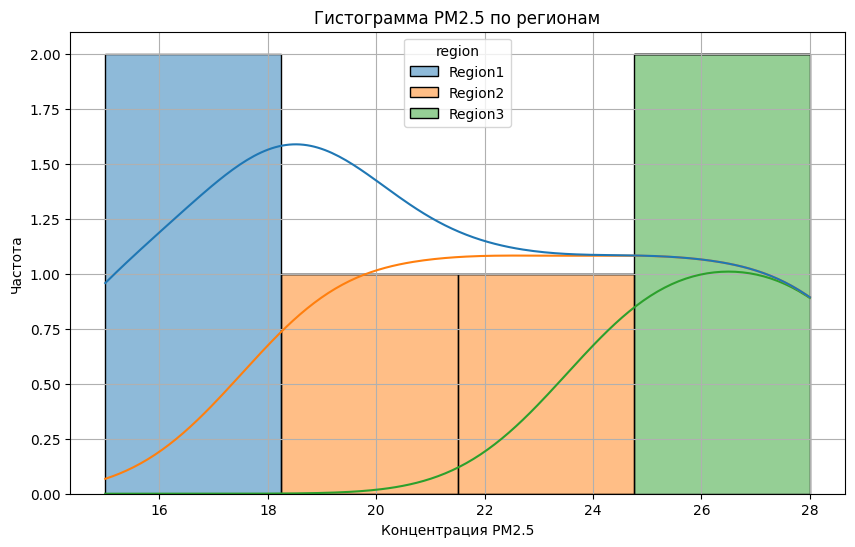

In [10]:


# Пример данных: PM2.5, CO2, NO2 для нескольких регионов
data = {
    "region": ["Region1", "Region1", "Region2", "Region2", "Region3", "Region3"],
    "datetime": [
        "2023-12-01 00:00:00", "2023-12-01 01:00:00",
        "2023-12-01 00:00:00", "2023-12-01 01:00:00",
        "2023-12-01 00:00:00", "2023-12-01 01:00:00"
    ],
    "PM2.5": [15.0, 18.0, 22.0, 19.0, 25.0, 28.0],
    "CO2": [400, 410, 405, 415, 420, 430],
    "NO2": [30, 35, 40, 38, 45, 50],
    "lat": [47.01, 47.01, 47.02, 47.02, 47.03, 47.03],
    "lon": [28.86, 28.86, 28.87, 28.87, 28.88, 28.88]
}

# Преобразование данных в DataFrame
df = pd.DataFrame(data)
df["datetime"] = pd.to_datetime(df["datetime"])

# 1. Описательная статистика
stats = df.describe()
print("Основные описательные статистики:\n", stats)

# 2. Анализ временных рядов для одного загрязнителя
plt.figure(figsize=(10, 6))
for region in df["region"].unique():
    region_data = df[df["region"] == region]
    plt.plot(region_data["datetime"], region_data["PM2.5"], label=region)

plt.title("Тенденция PM2.5 во времени")
plt.xlabel("Время")
plt.ylabel("Концентрация PM2.5")
plt.legend()
plt.grid(True)
plt.show()

# 3. Сравнение уровней загрязнителей в регионах
region_means = df.groupby("region")[["PM2.5", "CO2", "NO2"]].mean()
region_means.plot(kind="bar", figsize=(10, 6))
plt.title("Средние уровни загрязняющих веществ по регионам")
plt.ylabel("Концентрация")
plt.grid(True)
plt.show()

# 4. Визуализация тепловой карты
m = folium.Map(location=[47.01, 28.86], zoom_start=12)
heat_data = [[row['lat'], row['lon'], row['PM2.5']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("heatmap.html")
print("Тепловая карта сохранена как heatmap.html")

# 5. Гистограммы для сравнения
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="PM2.5", hue="region", multiple="stack", kde=True)
plt.title("Гистограмма PM2.5 по регионам")
plt.xlabel("Концентрация PM2.5")
plt.ylabel("Частота")
plt.grid(True)
plt.show()
